# You load a historical dataset from previous loan applications, clean the data, and apply different classification algorithm on the data. You are expected to use the following algorithms to build your models:
• k-Nearest Neighbour
• Decision Tree
• Support Vector Machine
• Logistic Regression
# The results is reported as the accuracy of each classifier, using the following metrics when these are applicable:
    • Jaccard index
    • F1-score
    • LogLoass

In [4]:
# import libraries 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# import classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection

# import mertics library 
from sklearn import metrics
from sklearn.metrics import f1_score,log_loss
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import accuracy_score

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [5]:
#!pip install missingno

In [6]:
df = pd.read_csv("loan.csv")
df.head()

In [7]:
# The code was removed by Watson Studio for sharing.

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Cleaning

In [8]:
df['Dependents'] = df['Dependents'].replace("3+",3)

In [9]:
df.isnull().sum()  # Missing values in dataset

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# data Analysis :  1 . univariate data Analysts 2. Bivariate data Analysis

In [11]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [12]:
df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

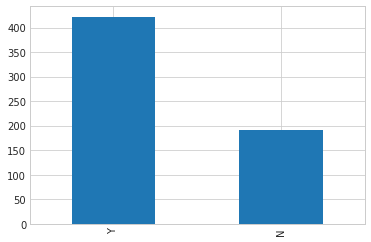

In [13]:
df['Loan_Status'].value_counts().plot.bar()

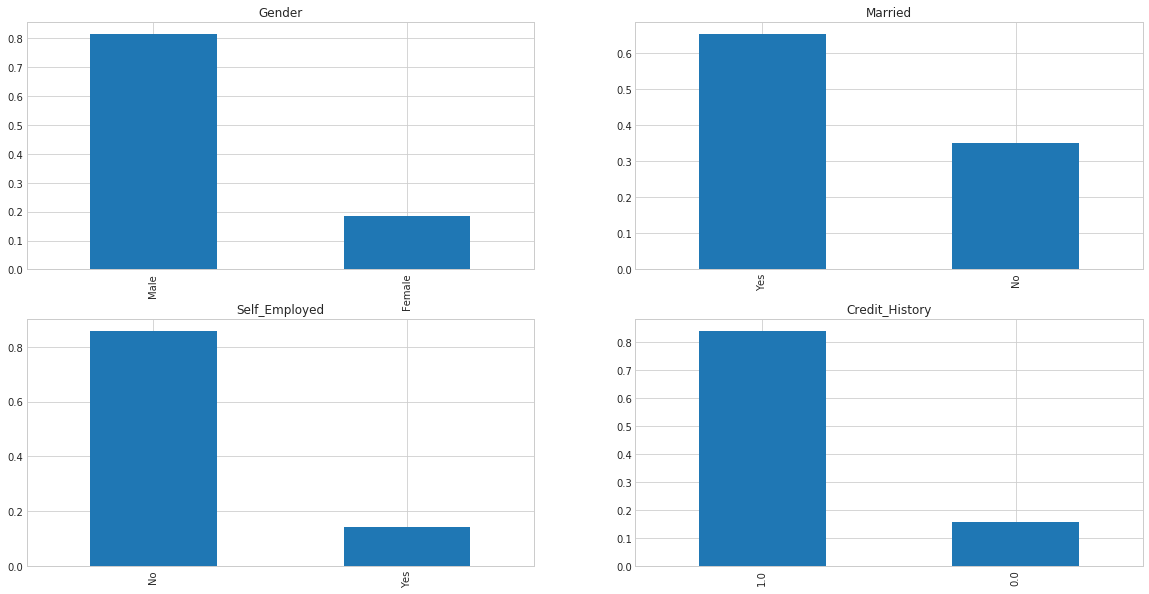

In [14]:
#Independent Variable (Categorical)
plt.figure(1) 
plt.subplot(221) 
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222) 
df['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
df['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
df['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

#   It can be inferred from the above bar plots that:

80% applicants in the dataset are male.
Around 65% of the applicants in the dataset are married.
Around 15% applicants in the dataset are self employed.
Around 85% applicants have repaid their debts.

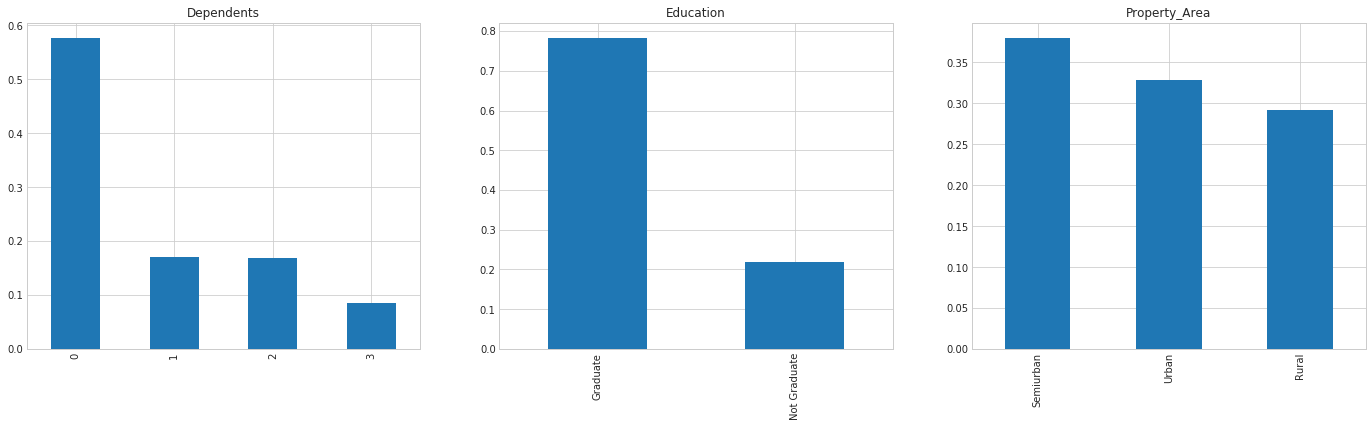

In [15]:
# Independent Variable (Ordinal)
plt.figure(1) 
plt.subplot(131) 
df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 
plt.subplot(132) 
df['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133)
df['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()


# Following inferences can be made from the above bar plots:

Most of the applicants don’t have any dependents.
Around 80% of the applicants are Graduate.
Most of the applicants are from Semiurban area.

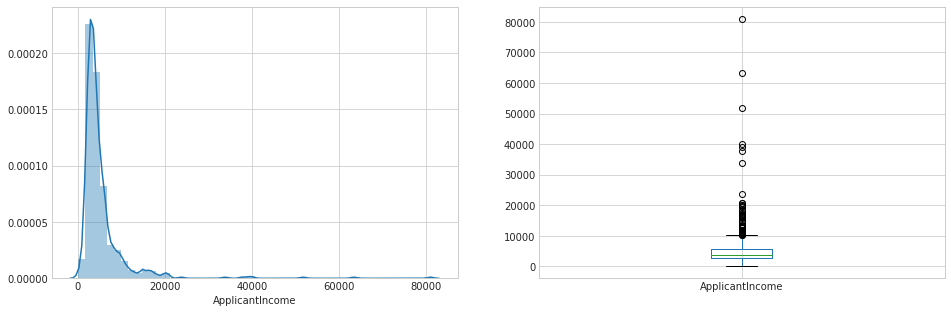

In [16]:
#Independent Variable (Numerical)
plt.figure(1) 
plt.subplot(121) 
sns.distplot(df['ApplicantIncome']); 
plt.subplot(122) 
df['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

#It can be inferred from above graph that most of the data in the distribution of applicant income is towards left which means it is not normally distributed.
#The boxplot confirms the presence of a lot of outliers/extreme values

Text(0.5, 0.98, '')

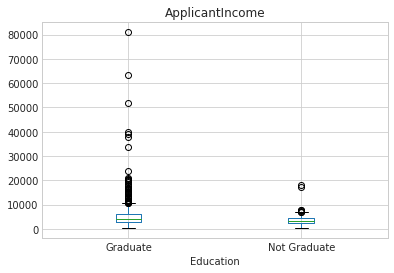

In [17]:
df.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

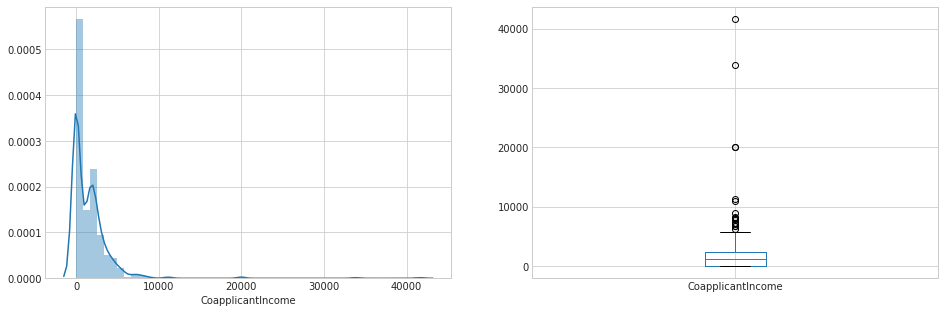

In [18]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(df['CoapplicantIncome']); 
plt.subplot(122) 
df['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

#a lot of outliers in the coapplicant income and it is not normally distributed.

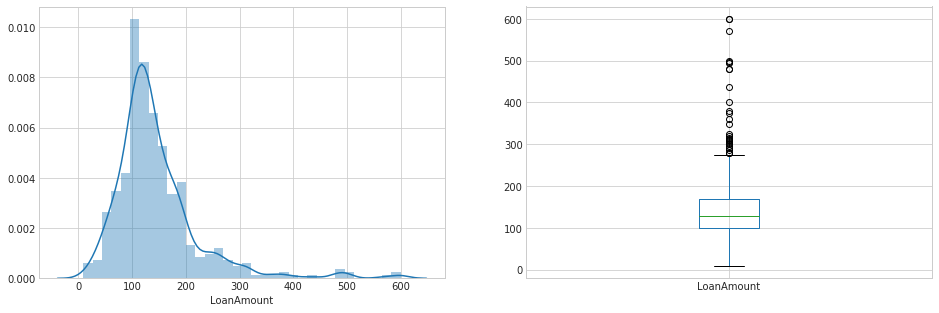

In [19]:
plt.figure(1) 
plt.subplot(121) 
df=df.dropna() 
sns.distplot(df['LoanAmount']); 
plt.subplot(122) 
df['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

# so the Hyposthesis generated is 
#Applicants with high income should have more chances of loan approval.
#Applicants who have repaid their previous debts should have higher chances of loan approval.
#Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
#Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

In [20]:
#test the above mentioned hypotheses using bivariate analysis

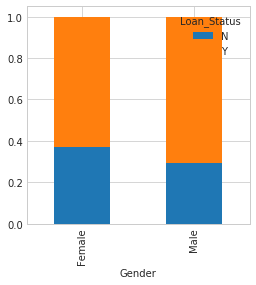

In [21]:
Gender=pd.crosstab(df['Gender'],df['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

#It can be inferred that the proportion of male and female applicants is more or less same for both approved and unapproved loans.

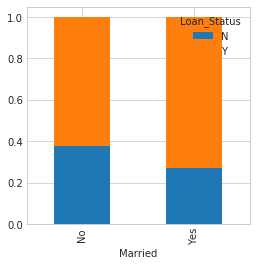

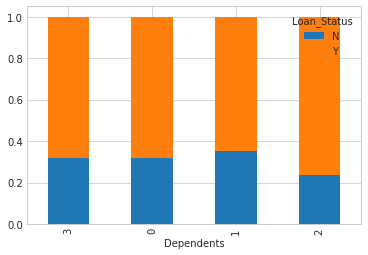

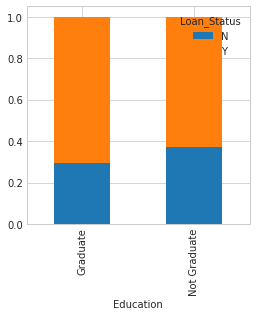

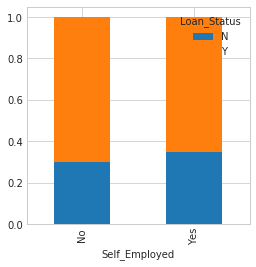

In [22]:
Married=pd.crosstab(df['Married'],df['Loan_Status']) 
Dependents=pd.crosstab(df['Dependents'],df['Loan_Status']) 
Education=pd.crosstab(df['Education'],df['Loan_Status']) 
Self_Employed=pd.crosstab(df['Self_Employed'],df['Loan_Status']) 

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

#Proportion of married applicants is higher for the approved loans.
#Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
#There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

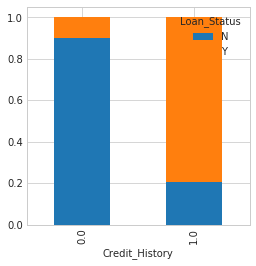

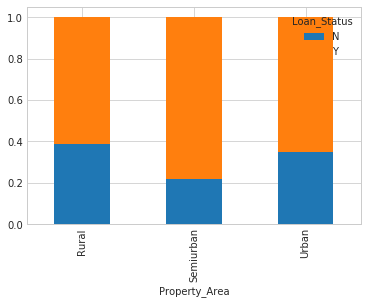

In [23]:
Credit_History=pd.crosstab(df['Credit_History'],df['Loan_Status']) 
Property_Area=pd.crosstab(df['Property_Area'],df['Loan_Status']) 

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

#It seems people with credit history as 1 are more likely to get their loans approved.
#Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

# Numerical Independent Variable vs Target Variable

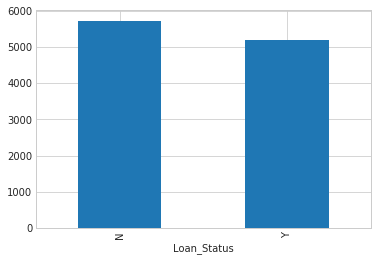

In [24]:
df.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [25]:
#Here the y-axis represents the mean applicant income. 
#We don’t see any change in the mean income. 
#So, let’s make bins for the applicant income variable based on the values in it 
#and analyze the corresponding loan status for each bin.

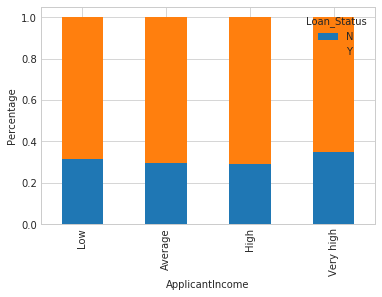

In [26]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
df['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(df['Income_bin'],df['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

In [27]:
#It can be inferred that Applicant income does not affect the chances of loan approval
#which contradicts our hypothesis in which we assumed that
#if the applicant income is high the chances of loan approval will also be high.

In [28]:
#We will analyze the coapplicant income and loan amount variable in similar manner.

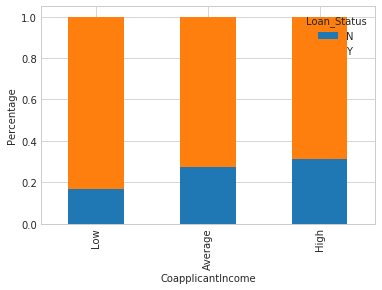

In [29]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
df['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(df['Coapplicant_Income_bin'],df['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')


In [30]:
#It shows that if coapplicant’s income is less the chances of loan approval are high. 
#But this does not look right. 
#The possible reason behind this may be that most of the applicants don’t have any coapplicant 
#so the coapplicant income for such applicants is 0 and 
#hence the loan approval is not dependent on it. 
#So we can make a new variable in which we will combine the applicant’s and coapplicant’s income 
#to visualize the combined effect of income on loan approval.

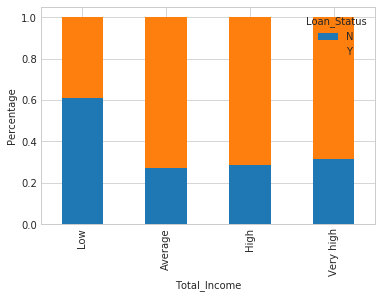

In [31]:
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
df['Total_Income_bin']=pd.cut(df['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(df['Total_Income_bin'],df['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')

#We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared 
#to that of applicants with Average, High and Very High Income.

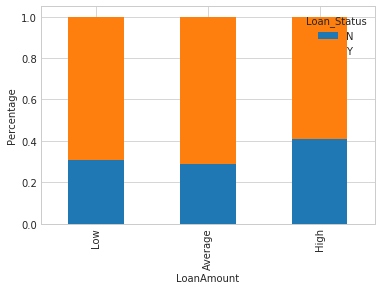

In [32]:
#Let’s visualize the Loan amount variable.
bins=[0,100,200,700] 
group=['Low','Average','High']
df['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(df['LoanAmount_bin'],df['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')


#It can be seen that the proportion of approved loans is higher for Low and
#Average Loan Amount as compared to that of High Loan Amount which supports 
#our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

In [33]:
#drop the bins which we created for the exploration part
df=df.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)


In [34]:
#Convert '3+' to numeric 3
#convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables.
df['Dependents'].replace('3+', 3,inplace=True)
df['Loan_Status'].replace('N', 0,inplace=True) 
df['Loan_Status'].replace('Y', 1,inplace=True)

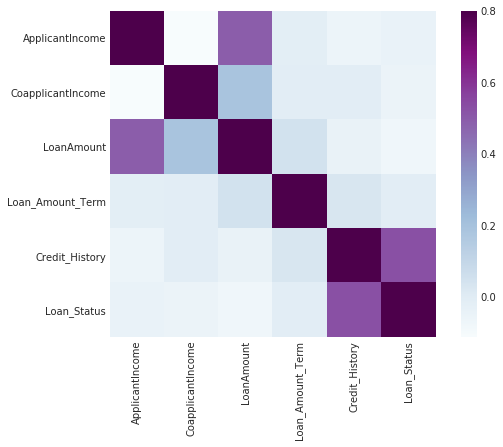

In [35]:
#Correlation Matrix
#correlation between all the numerical variables
matrix = df.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

#We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.  (Darker portion of the graph)

In [36]:
# Treating Missing values 
#For numerical variables: imputation using mean or median
#For categorical variables: imputation using mode

df['Gender'].fillna(df['Gender'].mode()[0], inplace=True) 
df['Married'].fillna(df['Married'].mode()[0], inplace=True) 
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True) 
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True) 
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [37]:
df['Loan_Amount_Term'].value_counts()

360.0    411
180.0     36
480.0     12
300.0      9
84.0       3
120.0      3
36.0       2
240.0      2
60.0       2
Name: Loan_Amount_Term, dtype: int64

In [38]:
# 360 is repeating the most. So i choseto replace the missing values in this variable using the mode of this variable.
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

In [39]:
# LoanAmount  : we may use mean or median 
# loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.
#df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [40]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [41]:
df.size

6240

# remove outliers from our data sets.

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. 
This is called right skewness. 
One way to remove the skewness is by doing the log transformation. 
As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. 
So, we get a distribution similar to normal distribution.

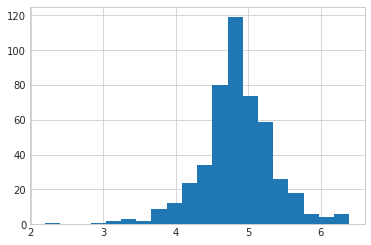

In [42]:
df['LoanAmount_log'] = np.log(df['LoanAmount']) 
df['LoanAmount_log'].hist(bins=20)

#Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let’s build a logistic regression model and make predictions for the test dataset.

In [43]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log'],
      dtype='object')

In [44]:
X= df[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 
       'Loan_Amount_Term', 'Credit_History', 'Property_Area','LoanAmount_log']]

In [45]:
y = df.Loan_Status

In [46]:
X=pd.get_dummies(X) 

In [47]:
X.head()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,4583,1508.0,360.0,1.0,4.852030,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,360.0,1.0,4.189655,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,360.0,1.0,4.787492,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,360.0,1.0,4.948760,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
5,5417,4196.0,360.0,1.0,5.587249,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1


In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size =0.3)

# Logistic Regression 

In [49]:
log_model = LogisticRegression() 
log_model.fit(x_train, y_train)
LogisticRegression(C=1.0,class_weight=None,dual=False,
                   fit_intercept=True,intercept_scaling=1, 
                   max_iter=100, multi_class='ovr', n_jobs=1,          
                   penalty='l2', random_state=1, solver='liblinear', 
                   tol=0.0001,verbose=0, warm_start=False)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
pred_log = log_model.predict(x_test)
pred_proba_log=log_model.predict_proba(x_test)

In [51]:
accuracy_score(y_test,pred_log)

0.7708333333333334

In [52]:
print("Logistic Regression accuracy", metrics.accuracy_score(y_test,pred_log))
print("Avg F1-score: %.4f" % f1_score(y_test, pred_log, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test,pred_log))
print("Log loss %.4f:"%log_loss(y_test,pred_proba_log))

Logistic Regression accuracy 0.7708333333333334
Avg F1-score: 0.7415
Jaccard score: 0.7708
Log loss 0.5324:


# SVM

In [53]:
clf = svm.SVC(kernel='rbf')
clf.fit(x_train,y_train)
svm_pred = clf.predict(x_test)


print("SVM accuracy", metrics.accuracy_score(y_test,svm_pred))
print("Avg F1-score: %.4f" % f1_score(y_test, svm_pred, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test,svm_pred))

SVM accuracy 0.6180555555555556
Avg F1-score: 0.4893
Jaccard score: 0.6181


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# KNN

In [54]:
k = 5
neigh = KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
pred_knn=neigh.predict(x_test)
pred_proba_knn=neigh.predict_proba(x_test)

print("KNN accuracy", metrics.accuracy_score(y_test,pred_knn))
print("Avg F1-score: %.4f" % f1_score(y_test,pred_knn, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test,pred_knn))

KNN accuracy 0.6180555555555556
Avg F1-score: 0.5366
Jaccard score: 0.6181


# Decision Tree 

In [55]:
decision_tree = DecisionTreeClassifier(criterion="entropy",max_depth=6)
decision_tree.fit(x_train,y_train)
decision_pred = decision_tree.predict(x_test)

print("Decision tree accuracy", metrics.accuracy_score(y_test,decision_pred))
print("Avg F1-score: %.4f" % f1_score(y_test, decision_pred, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test,decision_pred))


Decision tree accuracy 0.7013888888888888
Avg F1-score: 0.6711
Jaccard score: 0.7014
